In [1]:
import tensorflow as tf
import numpy as np

### construct Graph

In [4]:
hello=tf.constant("hello, world.")
a=tf.constant([3,2])
b=tf.constant([1,5])
# print(type(b))
c=tf.add(a,b)
# print(type(c))
print(c.get_shape())

(2,)


### run Graph in session 

In [4]:
with tf.Session() as sess:
    print(sess.run(hello))
    print(sess.run(c))
    print(c.eval())

b'hello, world.'
7
7


### another way to run sess

In [9]:
sess=tf.Session()
print(b.eval(session=sess))
sess.close()

4


## Graph as default

In [12]:
hi=tf.constant("HI")
print(hi.graph)
print(tf.get_default_graph())
# assert hi.graph is tf.get_default_graph()

with tf.Graph().as_default():
    hi2=tf.constant("hi2")
    print(tf.get_default_graph())
    print(hi2.graph)
    
with tf.Session() as sess:
    print(sess.run(hi))
    # print(sess.run(hi2)) # ERROR! is not an element of this graph.

b'HI'


In [16]:
# since FUNCTION is only compiled when CALL, so is default_graph is 
# the same as its CALLER
def func_graph(x):
    y=tf.add(x, x)
    print(y.graph)
    return y
a=tf.constant(2)
x=tf.constant(2)
y=func_graph(x)
with tf.Session() as sess:
    print(tf.get_default_graph())
    print(x.graph)
    print(y.graph)
    print(sess.run(y))

4


## specify graph in sess

In [24]:
# It's ok to run different Graph in a same sess. But you have to specify a Graph when init a Session.
with tf.Graph().as_default() as g1:
    a=tf.constant(1)
with tf.Graph().as_default() as g2:
    b=tf.constant(2)

with tf.Session(graph=g2) as sess:
    print(sess.run(b))

2


### variables

In [19]:
w=tf.Variable(initial_value=[[1,2,1],[1,3,4]],dtype=tf.float32, name='w')
x=tf.Variable(initial_value=[[1,1],[1,1],[1,1]],dtype=tf.float32, name='inputx')
y=tf.matmul(w,x)
z=tf.sigmoid(y)
print(z)
init_op=tf.global_variables_initializer()

Tensor("Sigmoid_1:0", shape=(2, 2), dtype=float32)


In [18]:
with tf.Session() as sess:
    sess.run(init_op)
    r=sess.run(z)
    r1=z.eval()
    print(r, r1)

[[ 0.98201376  0.98201376]
 [ 0.99966466  0.99966466]] [[ 0.98201376  0.98201376]
 [ 0.99966466  0.99966466]]


In [22]:
x1=tf.placeholder(tf.float32, shape=[2,3])
x2=tf.placeholder(tf.float32, shape=[3,2])
y=tf.matmul(x1,x2)
with tf.Session() as sess:
    m1=np.random.rand(2,3)
    m2=np.random.rand(3,2)
    print(sess.run(y, feed_dict={x1:m1, x2:m2}))

[[ 1.05303216  1.08981395]
 [ 1.53957582  1.75329125]]


## example linear regression

Epoch: 1, w: -0.8279005289077759, b: 9.703143119812012
Epoch: 2, w: 0.35090190172195435, b: 10.468274116516113
Epoch: 3, w: 1.1578450202941895, b: 10.316547393798828
Epoch: 4, w: 1.5950928926467896, b: 10.169244766235352
Epoch: 5, w: 1.8209246397018433, b: 10.085240364074707
Epoch: 6, w: 1.9362131357192993, b: 10.041342735290527
Epoch: 7, w: 1.9948949813842773, b: 10.018869400024414
Epoch: 8, w: 2.0247414112091064, b: 10.007421493530273
Epoch: 9, w: 2.03991961479187, b: 10.001596450805664
Epoch: 10, w: 2.0476369857788086, b: 9.998638153076172


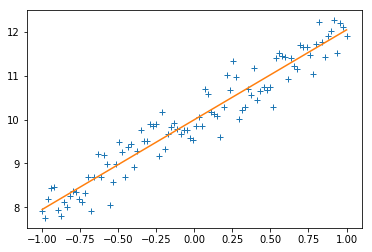

In [27]:
import matplotlib.pyplot as plt

# Prepare train data
train_X = np.linspace(-1, 1, 100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.33 + 10

# Define the model
X = tf.placeholder("float")
Y = tf.placeholder("float")
w = tf.Variable(0.0, name="weight")
b = tf.Variable(0.0, name="bias")
loss = tf.square(Y - X*w - b)
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

# Create session to run
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    epoch = 1
    for i in range(10):
        for (x, y) in zip(train_X, train_Y):
            _, w_value, b_value = sess.run([train_op, w, b],feed_dict={X: x,Y: y})
        print("Epoch: {}, w: {}, b: {}".format(epoch, w_value, b_value))
        epoch += 1


#draw
plt.plot(train_X,train_Y,"+")
plt.plot(train_X,train_X.dot(w_value)+b_value)
plt.show()